<a href="https://colab.research.google.com/github/nojiyoon/SeSAC_code/blob/main/1%EC%9B%9424%EC%9D%BC_%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5_%EC%9E%90%EC%A0%84%EA%B1%B0%EB%8C%80%EC%97%AC%ED%9A%9F%EC%88%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터
https://www.kaggle.com/c/bike-sharing-demand

### 컬럼정보
- datetime : hourly date + timestamp
- season : 1=봄, 2=여름, 3=가을, 4=겨울
- holiday : 1=휴일, 0=휴일이 아닌 날
- workingday: 1=주중, 0=주말
- weather : 1=맑음,약간구름낀 흐림, 2=안개,안개+흐림, 3=가벼운눈,가벼운비+천둥, 4=심한눈/비,천둥/번개
- temp: 온도(섭씨)
- atemp: 체감온도(섭씨)
- humidity: 상대습도
- windspeed: 풍속
- casual: 사전에 등록되지 않은 사용자가 대여한 횟수
- registered: 사전에 등록한 사용자가 대여한 횟수
- count: 대여횟수 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 해줌
plt.style.use('ggplot')

In [ ]:
 train = pd.read_csv('/content/drive/MyDrive/2022새싹/인공지능 자연어처리 및 음성인식 음성합성 기술을 활용한 응용 SW 개발자 양성과정 /1.머신러닝/workspace/bike.csv')
 train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# datetime을 년, 월, 일, 시, 분 칼럼으로 나누기

datetime = train['datetime']
datetime.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [ ]:
train['year'] = datetime.dt.year
train['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [ ]:
train['month'] = datetime.dt.month
train['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [ ]:
train['day'] = datetime.dt.day
train['day'].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [ ]:
train['hour'] = datetime.dt.hour
train['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [ ]:
train['minute'] = datetime.dt.minute
train['minute'].head()

0    0
1    0
2    0
3    0
4    0
Name: minute, dtype: int64

In [ ]:
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [ ]:
# 대여한 자전거수
# 2011~2012 전체평균

train['count'].mean()

191.57413191254824

In [ ]:
train.groupby('year')

In [ ]:
list(train.groupby('year'))

[(2011,
                  datetime  season  holiday  workingday  ...  month  day  hour  minute
  0    2011-01-01 00:00:00       1        0           0  ...      1    1     0       0
  1    2011-01-01 01:00:00       1        0           0  ...      1    1     1       0
  2    2011-01-01 02:00:00       1        0           0  ...      1    1     2       0
  3    2011-01-01 03:00:00       1        0           0  ...      1    1     3       0
  4    2011-01-01 04:00:00       1        0           0  ...      1    1     4       0
  ...                  ...     ...      ...         ...  ...    ...  ...   ...     ...
  5417 2011-12-19 19:00:00       4        0           1  ...     12   19    19       0
  5418 2011-12-19 20:00:00       4        0           1  ...     12   19    20       0
  5419 2011-12-19 21:00:00       4        0           1  ...     12   19    21       0
  5420 2011-12-19 22:00:00       4        0           1  ...     12   19    22       0
  5421 2011-12-19 23:00:00       4 

In [ ]:
# 연도별 대여대수 평균
train.groupby('year').mean()[['count']]

,count
year,
2011,144.223349
2012,238.560944


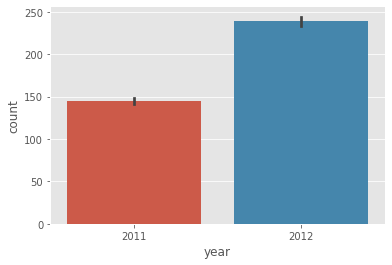

In [ ]:
sns.barplot(data=train, x='year', y='count')

In [ ]:
# 월별 대여대수 평균
train.groupby('month').mean()[['count']]

,count
month,
1,90.366516
2,110.003330
3,148.169811
4,184.160616
5,219.459430
6,242.031798
7,235.325658
8,234.118421
9,233.805281


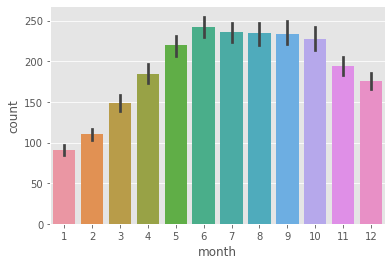

In [ ]:
sns.barplot(data=train, x='month', y='count')

In [ ]:
# 시간별 대여대수 평균
train.groupby('hour').mean()[['count']]

,count
hour,
0,55.138462
1,33.859031
2,22.899554
3,11.757506
4,6.407240
5,19.767699
6,76.259341
7,213.116484
8,362.769231


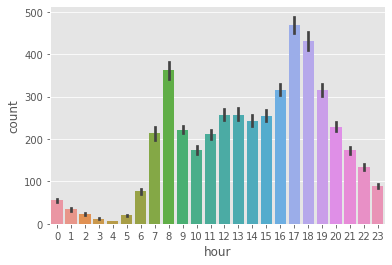

In [ ]:
# 출퇴근 시간에 많이 빌림
sns.barplot(data=train, x='hour', y='count')

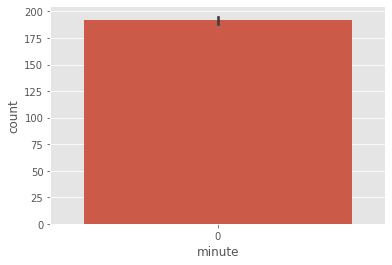

In [ ]:
# 모든 데이터가 0. 삭제할 것.
sns.barplot(data=train, x='minute', y='count')

In [ ]:
train['dayofweek'] = datetime.dt.dayofweek
train['dayofweek'].head()

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

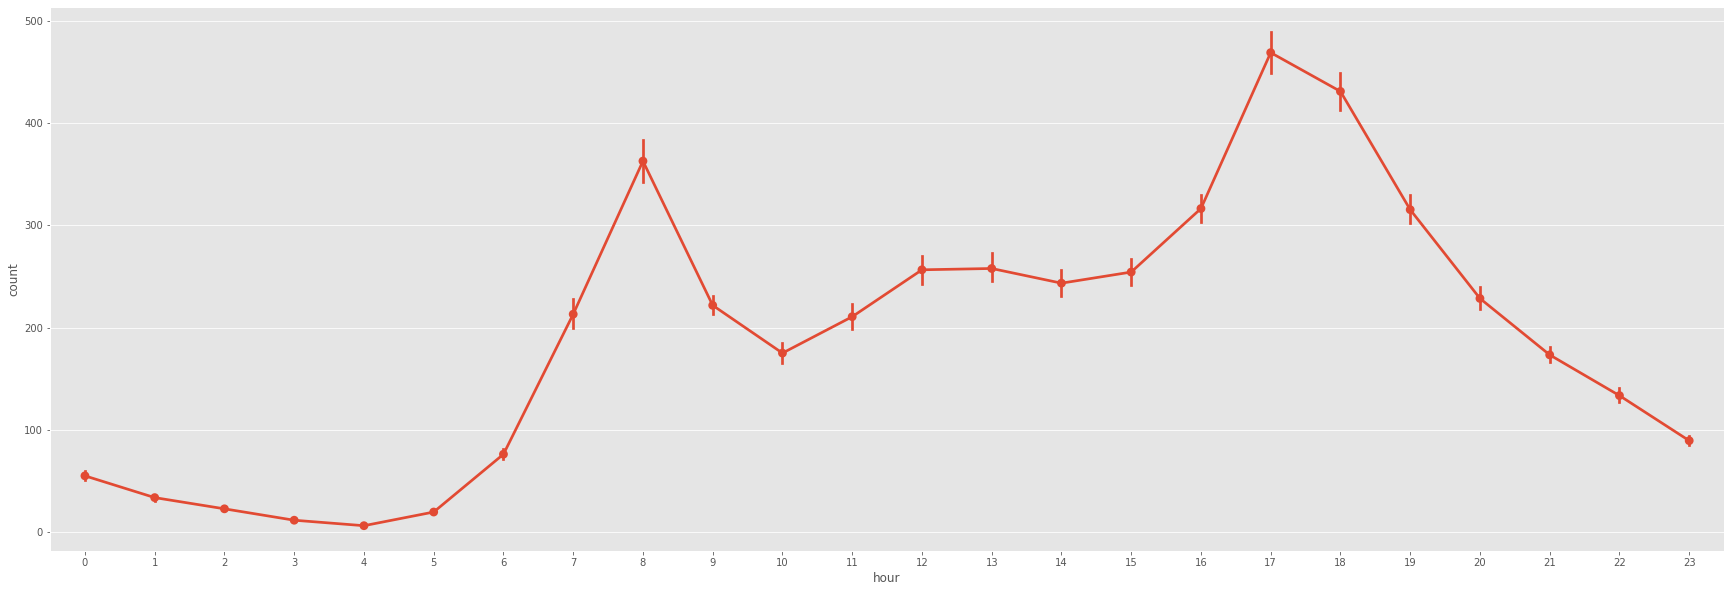

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count')

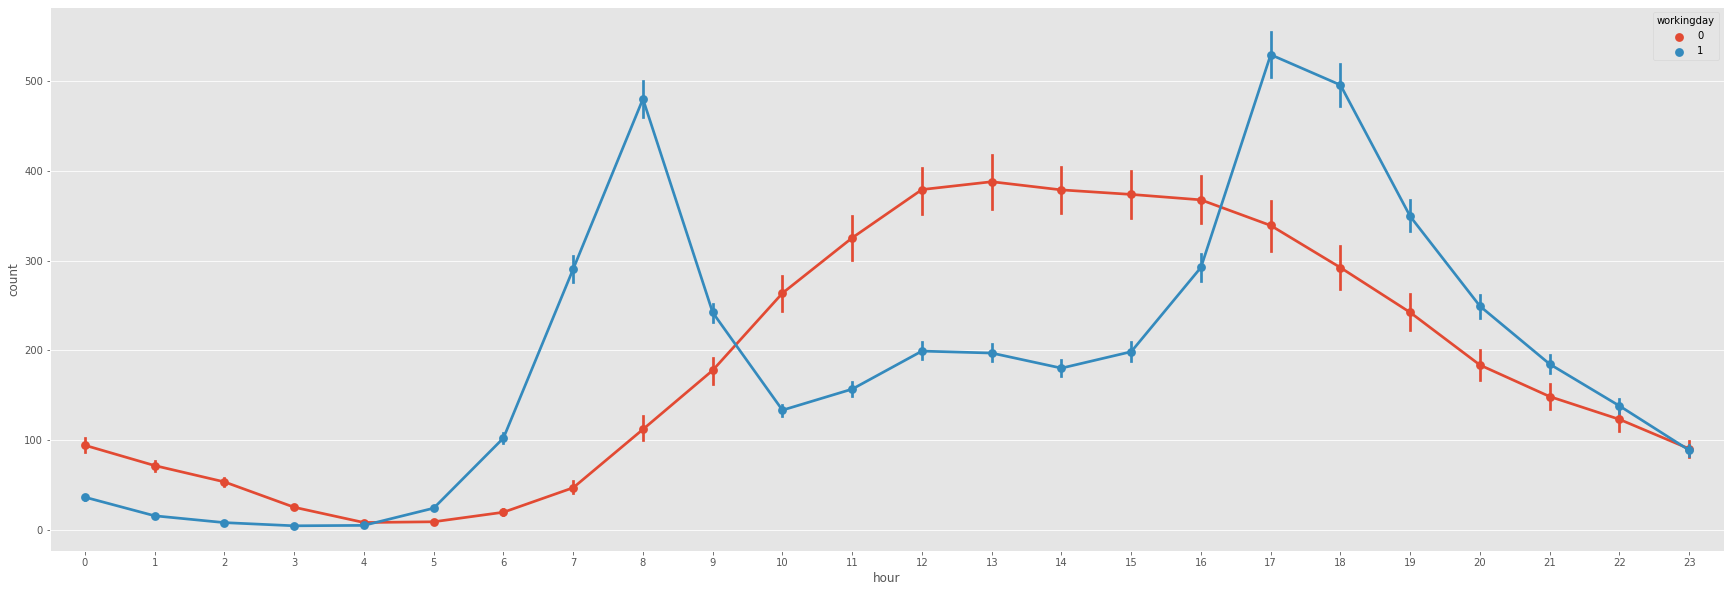

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue='workingday')

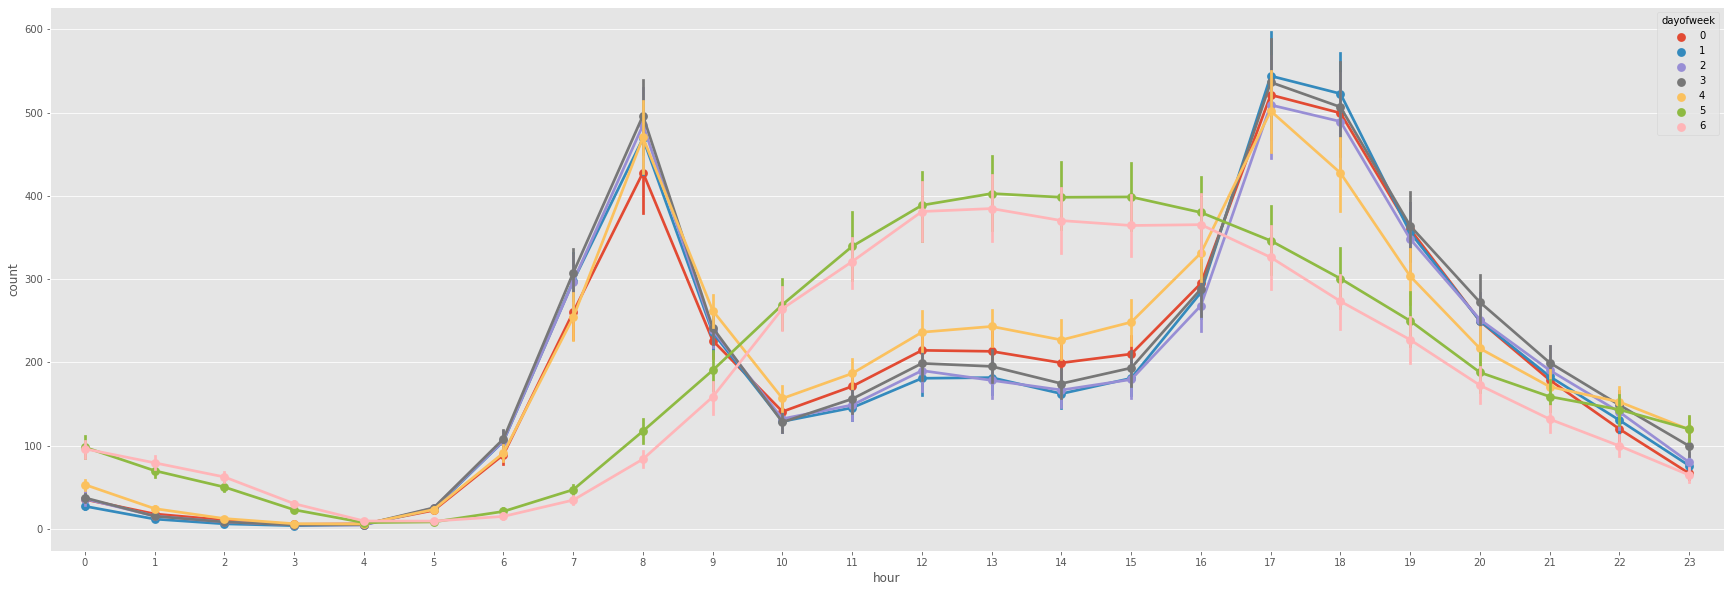

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek')

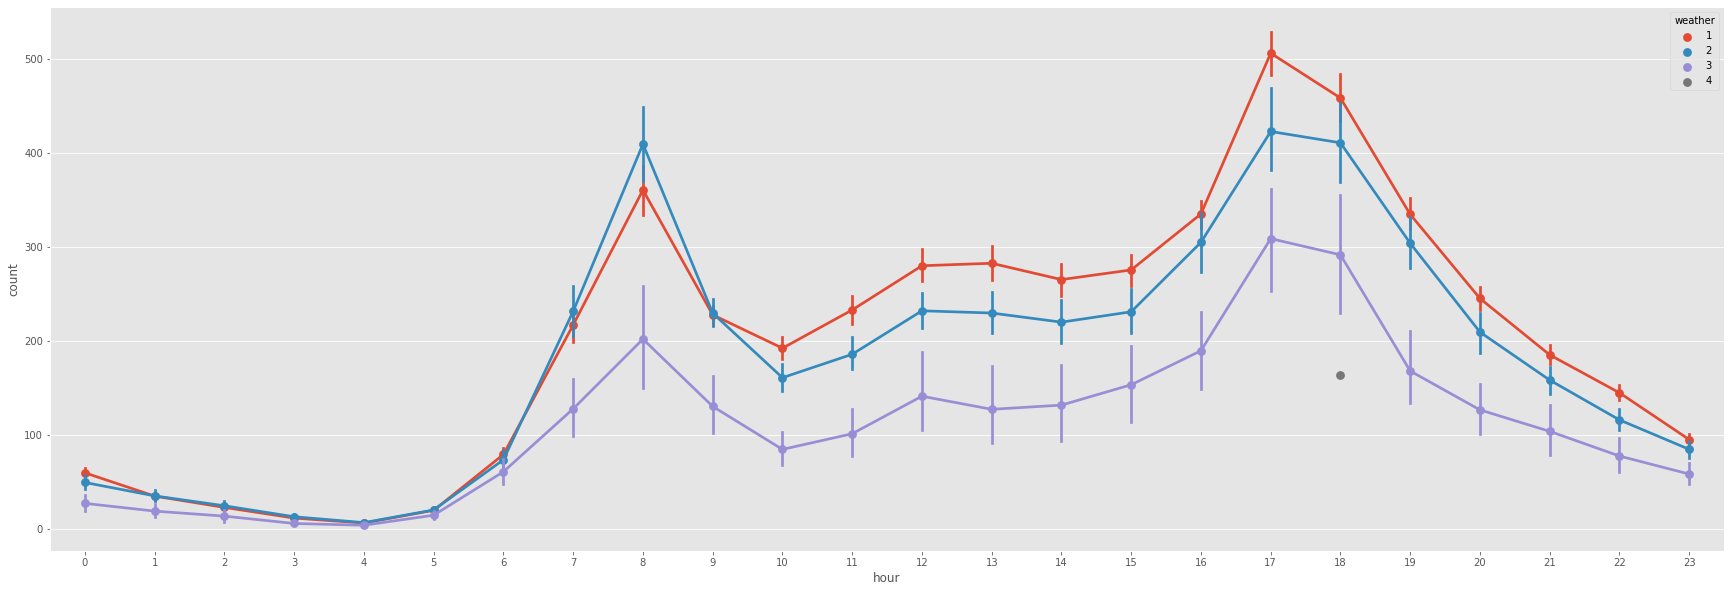

In [ ]:
# 1=맑음,약간구름낀 흐림, 2=안개,안개+흐림, 3=가벼운눈,가벼운비+천둥, 4=심한눈/비,천둥/번개

plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue='weather')

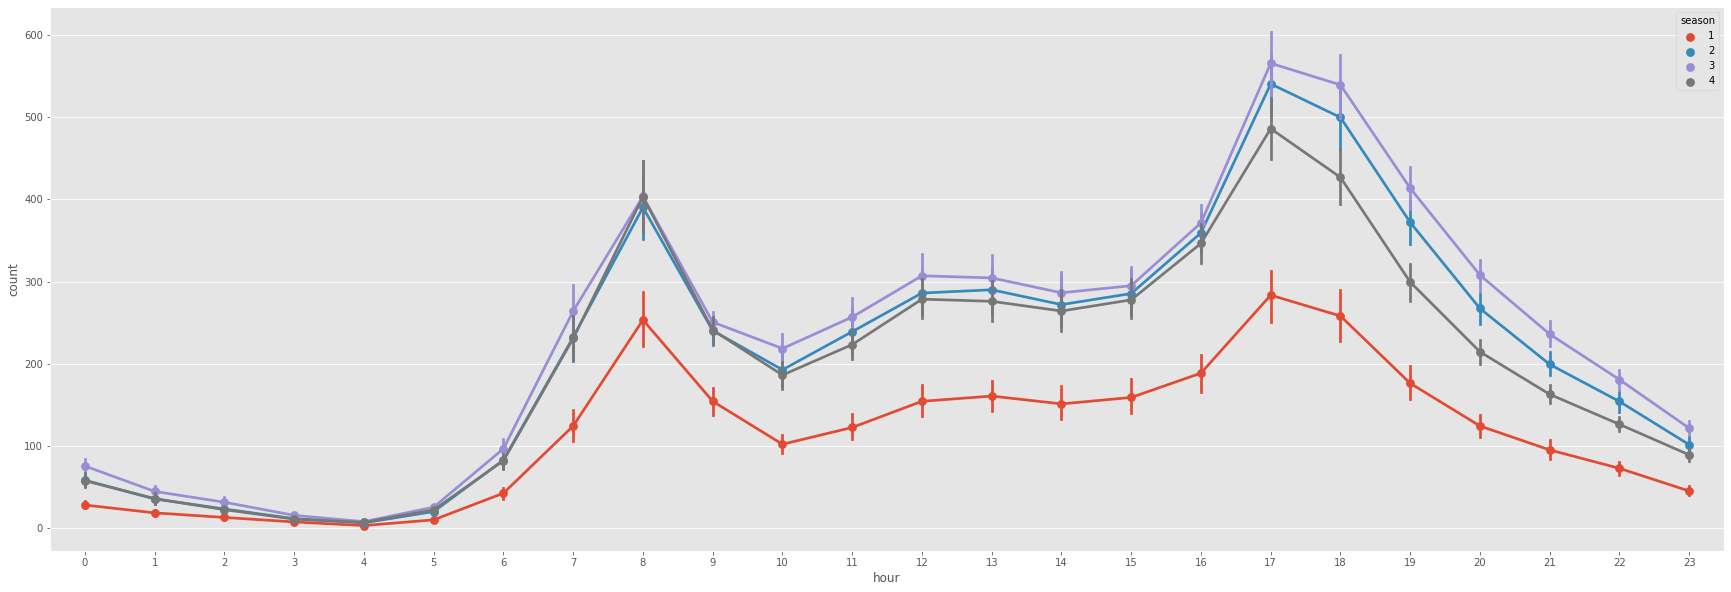

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue='season')

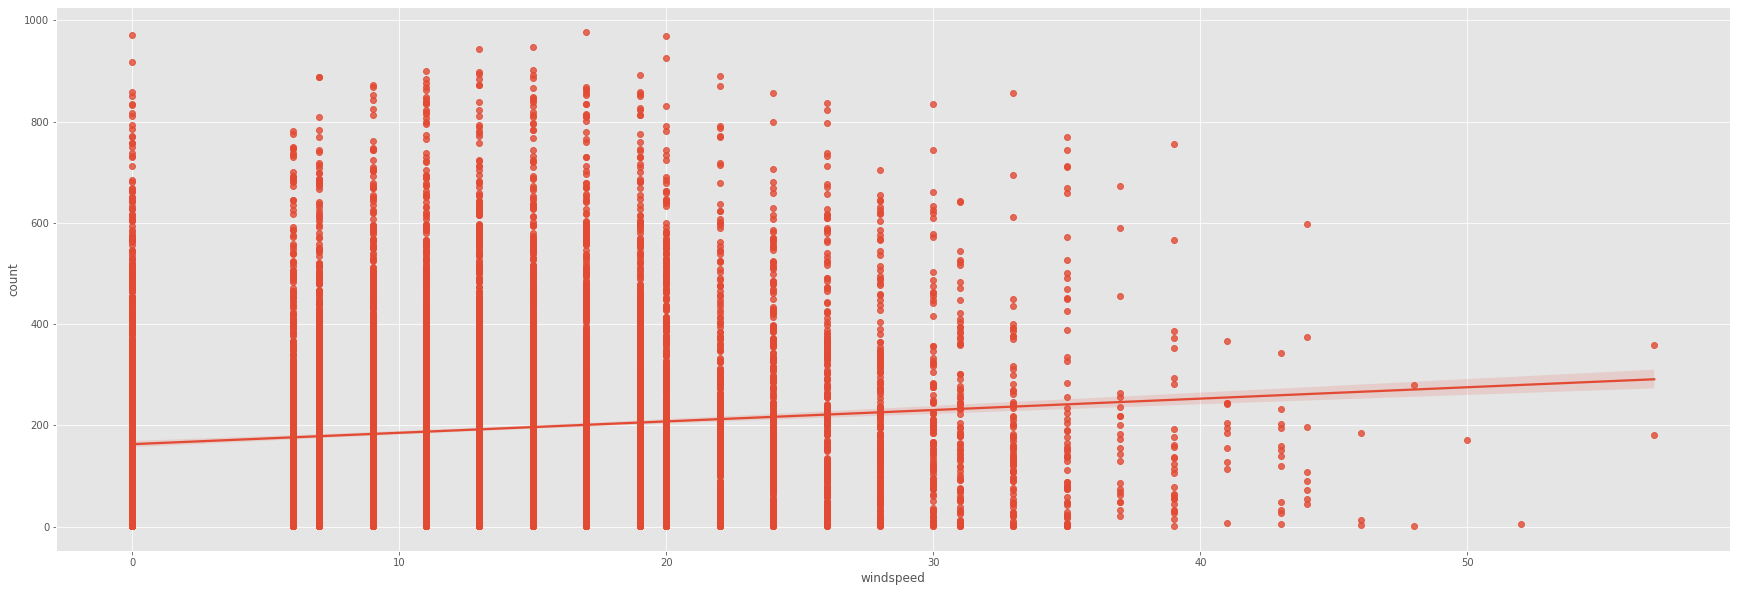

In [ ]:
# 풍속별 대여횟수의 값을 점으로 표시
# 0은 관측되지 않은 수치일 것으로 추측.

plt.figure(figsize=(30,10))
sns.regplot(data=train, x='windspeed', y='count')

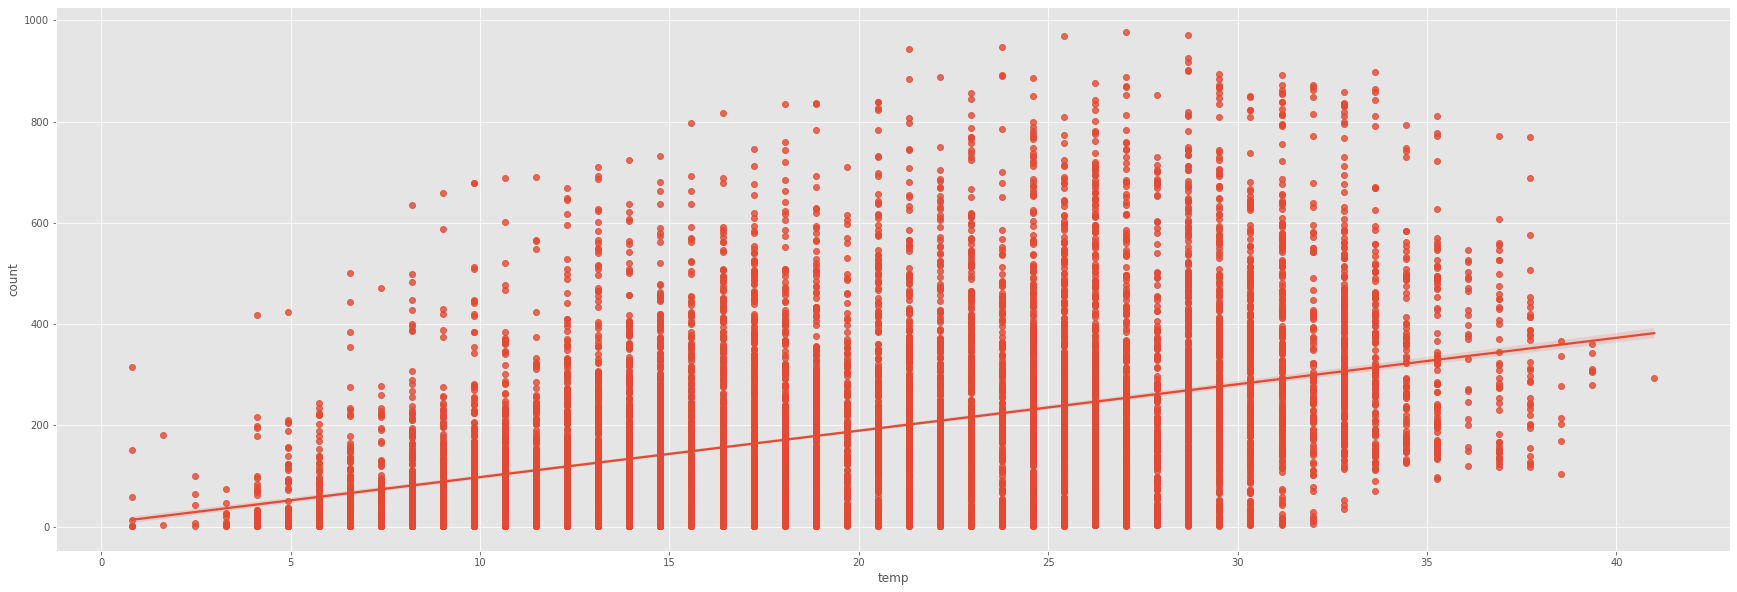

In [ ]:
# 온도별 대여횟수

plt.figure(figsize=(30,10))
sns.regplot(data=train, x='temp', y='count')

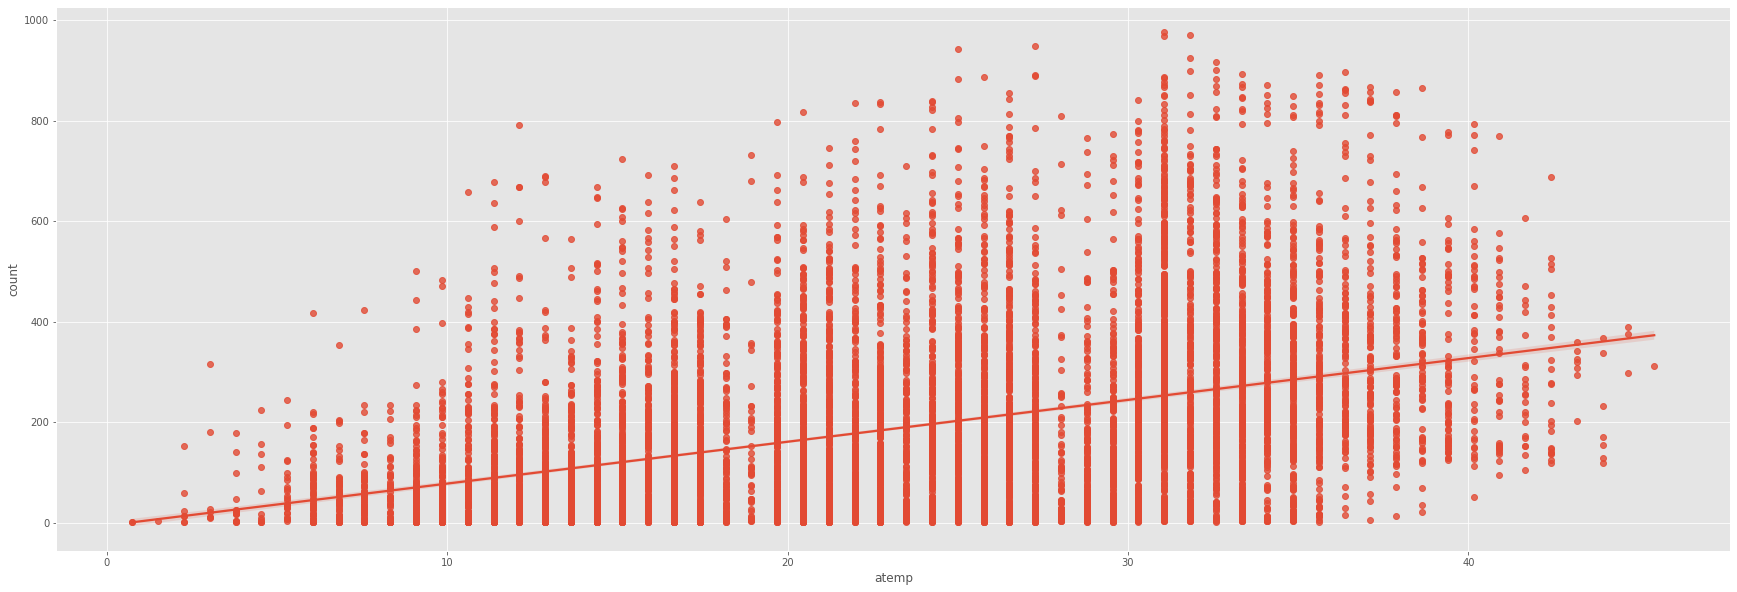

In [ ]:
# 체감온도별 대여횟수

plt.figure(figsize=(30,10))
sns.regplot(data=train, x='atemp', y='count')

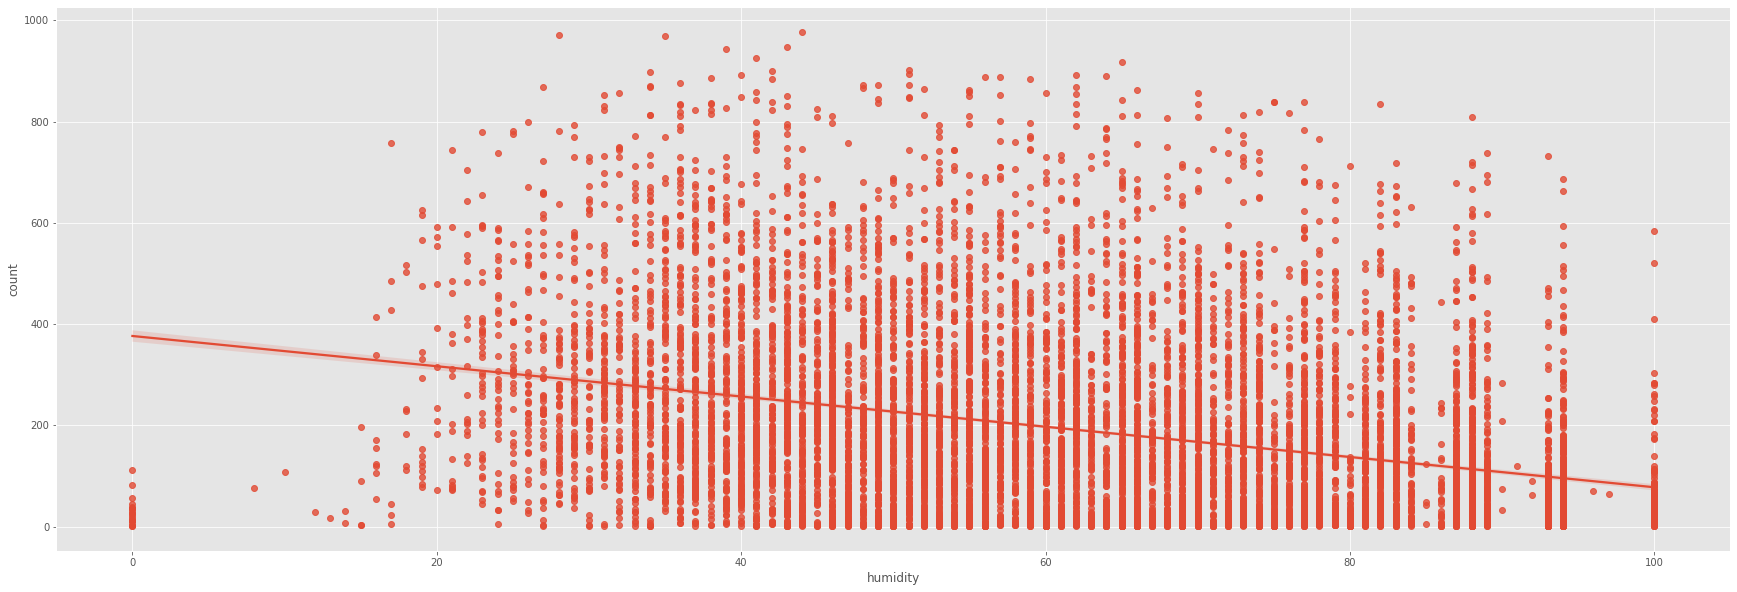

In [ ]:
# 상대습도별 대여횟수

plt.figure(figsize=(30,10))
sns.regplot(data=train, x='humidity', y='count')

In [ ]:
train[['casual','registered','count']].head()

,casual,registered,count
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1


# 상관분석

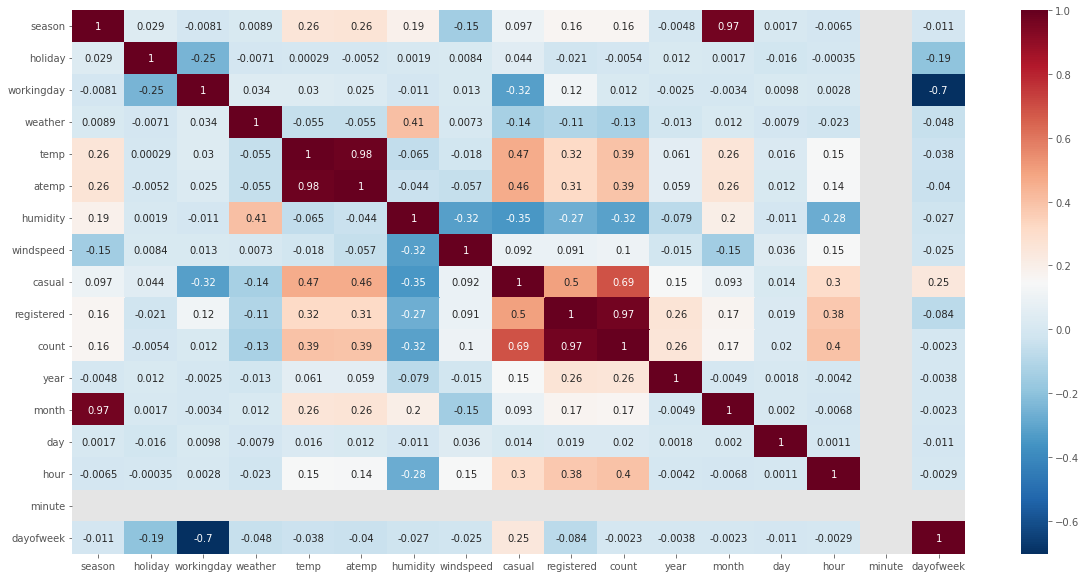

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(), annot=True, cmap='RdBu_r')

# 회귀분석

In [ ]:
y = train['count']

In [ ]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [ ]:
X = train.copy()

In [ ]:
X.pop('count')
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0,5


In [ ]:
X.pop('datetime')

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [ ]:
X.pop('registered')
X.pop('casual')
X.pop('day')
X.pop('minute')

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: minute, Length: 10886, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=0)

In [ ]:
rf_model

RandomForestRegressor(random_state=0)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
pred = rf_model.predict(X_test)

In [ ]:
pred

array([ 33.95, 547.64,  89.25, ..., 318.19, 143.25, 330.48])

In [ ]:
from sklearn.metrics import mean_squared_error

print('MSE: ', mean_squared_error(y_test, pred))

MSE:  1508.207127363649


# 이상값 조회

In [ ]:
q1 = np.percentile(train['count'], 25)
q1

42.0

In [ ]:
q3 = np.percentile(train['count'], 75)
q3

284.0

In [ ]:
IQR = q3 - q1
IQR

242.0

In [ ]:
trainWithoutOutliers = \
    train[(train['count']>=q1-(1.5*IQR)) & (train['count']<=q3+(1.5*IQR))]

In [ ]:
trainWithoutOutliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,2


In [ ]:
trainOutliers = \
    train[(train['count']<q1-(1.5*IQR)) | (train['count']>q3+(1.5*IQR))]

In [ ]:
trainOutliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712,2012,3,12,18,0,0
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.820,37,7.0015,62,614,676,2012,3,13,17,0,1
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.820,34,19.9995,96,638,734,2012,3,13,18,0,1
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.970,82,0.0000,34,628,662,2012,3,14,8,0,2
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-12-11 08:00:00,4,0,1,2,13.94,15.150,61,19.9995,16,708,724,2012,12,11,8,0,1
10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688,2012,12,12,8,0,2
10726,2012-12-13 08:00:00,4,0,1,1,9.84,11.365,60,12.9980,24,655,679,2012,12,13,8,0,3
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,2012,12,18,8,0,1


In [ ]:
train = trainWithoutOutliers.copy()

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,2


In [ ]:
# 6611 인덱스가 비어있음
train.iloc[6610:6615, :]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek
6610,2012-03-12 17:00:00,1,0,1,2,25.42,31.060,38,27.9993,87,557,644,2012,3,12,17,0,0
6612,2012-03-12 19:00:00,1,0,1,2,22.96,26.515,49,15.0013,67,379,446,2012,3,12,19,0,0
6613,2012-03-12 20:00:00,1,0,1,2,22.96,26.515,49,15.0013,49,237,286,2012,3,12,20,0,0
6614,2012-03-12 21:00:00,1,0,1,2,22.14,25.760,56,15.0013,22,183,205,2012,3,12,21,0,0
6615,2012-03-12 22:00:00,1,0,1,2,22.96,26.515,56,15.0013,17,116,133,2012,3,12,22,0,0


In [ ]:
train.index = range(len(train))

In [ ]:
# 비어있는 인덱스 없음
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,2
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,2
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,2
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,2


In [ ]:
train.iloc[6610:6615, :]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek
6610,2012-03-12 17:00:00,1,0,1,2,25.42,31.060,38,27.9993,87,557,644,2012,3,12,17,0,0
6611,2012-03-12 19:00:00,1,0,1,2,22.96,26.515,49,15.0013,67,379,446,2012,3,12,19,0,0
6612,2012-03-12 20:00:00,1,0,1,2,22.96,26.515,49,15.0013,49,237,286,2012,3,12,20,0,0
6613,2012-03-12 21:00:00,1,0,1,2,22.14,25.760,56,15.0013,22,183,205,2012,3,12,21,0,0
6614,2012-03-12 22:00:00,1,0,1,2,22.96,26.515,56,15.0013,17,116,133,2012,3,12,22,0,0


# 데이터 정규화

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


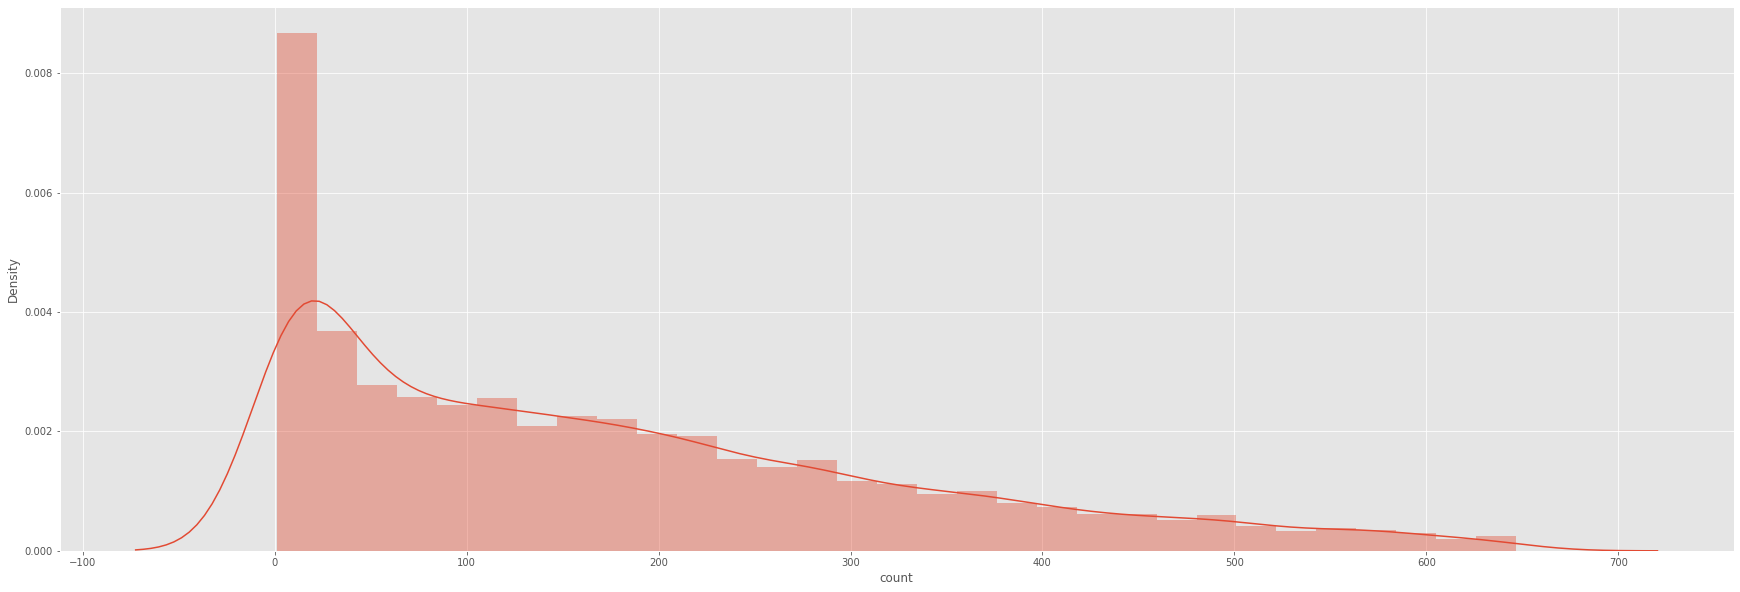

In [ ]:
plt.figure(figsize=(30,10))

sns.distplot(train['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


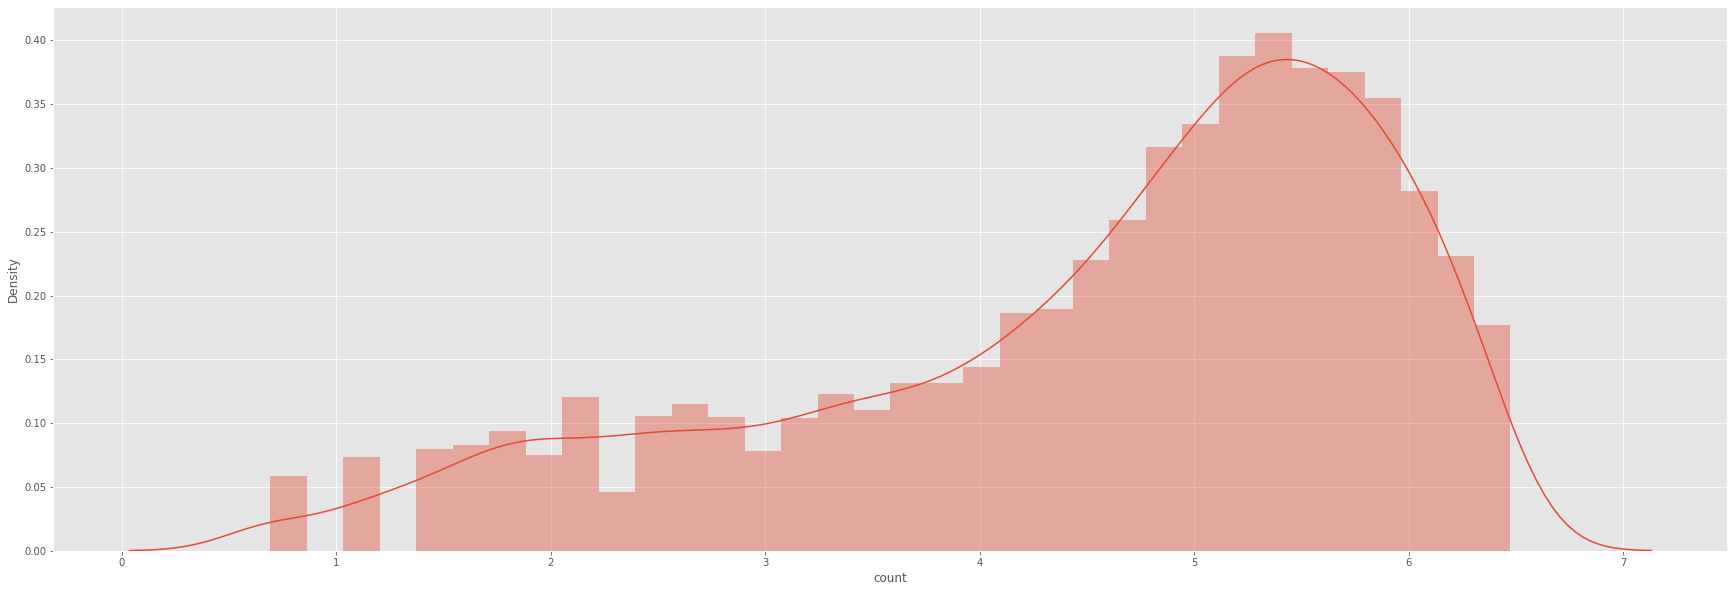

In [ ]:
# 로그를 취하면 데이터의 몰림이 어느정도 해소됨

train['count'] = np.log1p(train['count'])

plt.figure(figsize=(30,10))
sns.distplot(train['count'])

# 회귀분석

In [ ]:
y = train['count']
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [ ]:
X = train.copy()

In [ ]:
X.pop('count')
X.pop('datetime')
X.pop('registered')
X.pop('casual')
X.pop('day')
X.pop('minute')

0        0
1        0
2        0
3        0
4        0
        ..
10581    0
10582    0
10583    0
10584    0
10585    0
Name: minute, Length: 10586, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [ ]:
rf_model = RandomForestRegressor(random_state=0)

In [ ]:
rf_model

RandomForestRegressor(random_state=0)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
pred = rf_model.predict(X_test)

In [ ]:
pred

array([5.22521988, 6.35009589, 5.02216584, ..., 4.61489246, 4.26156294,
       4.92807568])

In [ ]:
print('MSE: ', mean_squared_error(y_test, pred))

MSE:  0.09544071772145922


# 전처리

## 결측치 처리

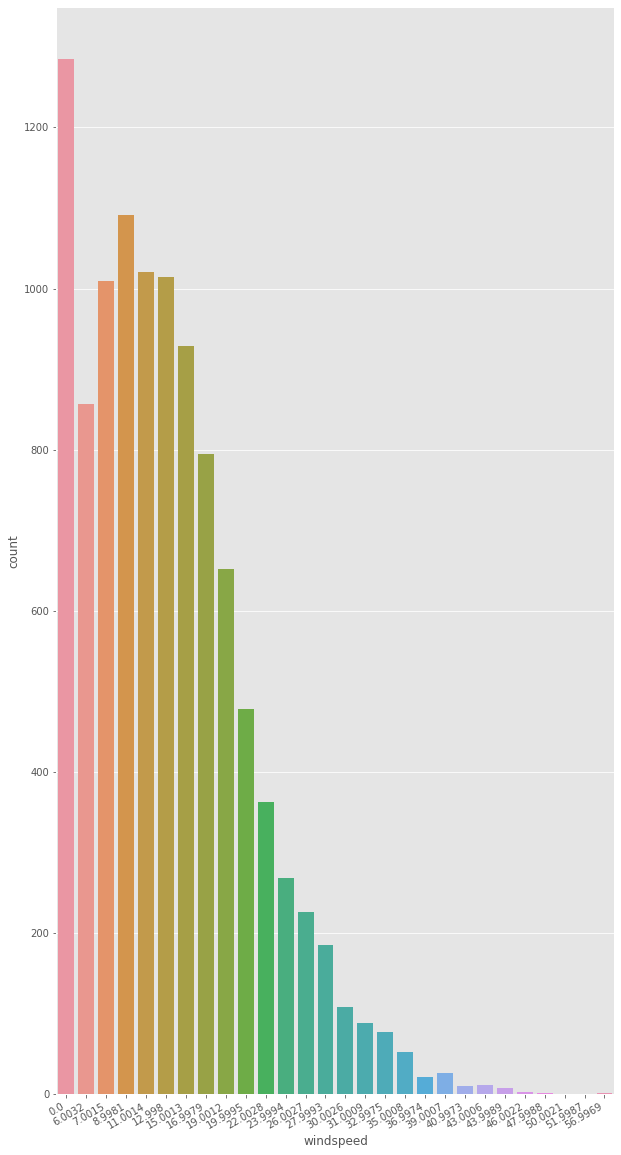

In [ ]:
plt.figure(figsize=(10,20))
plt.xticks(rotation=30, ha='right')
sns.countplot(data=train, x='windspeed')

In [ ]:
trainWind0 = train[train['windspeed']==0]

In [ ]:
trainWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,1,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,2,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,3,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10525,2012-12-17 09:00:00,4,0,1,2,16.40,20.455,87,0.0,11,271,5.645447,2012,12,17,9,0,0
10528,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,5.451038,2012,12,17,12,0,0
10531,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,5.356586,2012,12,17,15,0,0
10561,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,4.890349,2012,12,18,22,0,1


In [ ]:
trainWindNot0 = train[train['windspeed'] != 0]

In [ ]:
trainWindNot0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,0.693147,2011,1,1,5,0,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,3.610918,2011,1,1,10,0,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,4.043051,2011,1,1,11,0,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,4.442651,2011,1,1,12,0,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,4.553877,2011,1,1,13,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,2
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,2
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,2
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,2


In [ ]:
trainWindNot0['windspeed'].mean()

14.541892215891192

In [ ]:
X = train.copy()

In [ ]:
X[X['windspeed']==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,1,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,2,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,3,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10525,2012-12-17 09:00:00,4,0,1,2,16.40,20.455,87,0.0,11,271,5.645447,2012,12,17,9,0,0
10528,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,5.451038,2012,12,17,12,0,0
10531,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,5.356586,2012,12,17,15,0,0
10561,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,4.890349,2012,12,18,22,0,1


In [ ]:
X.loc[X['windspeed']==0, 'windspeed'] = trainWindNot0['windspeed'].mean()

## 컬럼 추가(peak)

In [ ]:
train['peak'] = 0

In [ ]:
for index in range(len(train)):
  workingday = train.loc[index, 'workingday']
  hour = train.loc[index, 'hour']
  print('index:', index)
  print('workingday:', workingday)
  print('hour:', hour)
  print('='*100)
  # 근무일일 때
  if workingday==1:
    if hour==8 | (17<=hour<=18):
      train.loc[index, 'peak']=1
  # 휴일일 때
  else:
    if 10<=hour<=19:
      train.loc[index, 'peak']=1


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
index: 9336
workingday: 1
hour: 4
index: 9337
workingday: 1
hour: 5
index: 9338
workingday: 1
hour: 6
index: 9339
workingday: 1
hour: 7
index: 9340
workingday: 1
hour: 9
index: 9341
workingday: 1
hour: 10
index: 9342
workingday: 1
hour: 11
index: 9343
workingday: 1
hour: 12
index: 9344
workingday: 1
hour: 13
index: 9345
workingday: 1
hour: 14
index: 9346
workingday: 1
hour: 15
index: 9347
workingday: 1
hour: 16
index: 9348
workingday: 1
hour: 19
index: 9349
workingday: 1
hour: 20
index: 9350
workingday: 1
hour: 21
index: 9351
workingday: 1
hour: 22
index: 9352
workingday: 1
hour: 23
index: 9353
workingday: 1
hour: 0
index: 9354
workingday: 1
hour: 1
index: 9355
workingday: 1
hour: 2
index: 9356
workingday: 1
hour: 3
index: 9357
workingday: 1
hour: 4
index: 9358
workingday: 1
hour: 5
index: 9359
workingday: 1
hour: 6
index: 9360
workingday: 1
hour: 7
index: 9361
workingday: 1
hour: 9
index: 9362
workingday: 1
hour: 10
index: 9363
workingday: 1
hour: 1

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek,peak
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,5,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,5,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,5,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,2,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,2,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,2,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,2,0


## 컬럼추가 (ideal)
- 온도가 27도 이상이고 풍속이 30 미만이면

In [ ]:
train['ideal'] = 0

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek,peak,ideal
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,5,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,5,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,5,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,5,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,2,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,2,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,2,0,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,2,0,0


In [ ]:
for index in range(len(train)):
  if (train.loc[index, 'temp']>27) & (train.loc[index,'windspeed']<30):
    train.loc[index,'ideal'] = 1

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek,peak,ideal
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,5,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,5,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,5,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,5,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,2,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,2,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,2,0,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,2,0,0


In [ ]:
train[train['ideal']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek,peak,ideal
843,2011-02-18 14:00:00,1,0,1,1,27.06,31.060,36,19.9995,73,118,5.257495,2011,2,18,14,0,4,0,1
844,2011-02-18 15:00:00,1,0,1,1,27.06,31.060,36,22.0028,55,117,5.153292,2011,2,18,15,0,4,0,1
845,2011-02-18 16:00:00,1,0,1,1,27.06,31.060,36,19.0012,68,164,5.451038,2011,2,18,16,0,4,0,1
846,2011-02-18 17:00:00,1,0,1,1,27.06,31.060,34,23.9994,52,275,5.793014,2011,2,18,17,0,4,0,1
1289,2011-03-18 14:00:00,1,0,1,1,27.06,31.060,39,16.9979,71,103,5.164786,2011,3,18,14,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9388,2012-10-05 15:00:00,4,0,1,1,29.52,32.575,39,16.9979,150,320,6.154858,2012,10,5,15,0,4,0,1
9389,2012-10-05 16:00:00,4,0,1,1,29.52,32.575,37,0.0000,153,481,6.453625,2012,10,5,16,0,4,0,1
9585,2012-10-14 14:00:00,4,0,0,1,27.06,31.060,39,27.9993,249,368,6.426488,2012,10,14,14,0,6,1,1
9586,2012-10-14 15:00:00,4,0,0,1,27.06,31.060,39,27.9993,213,355,6.343880,2012,10,14,15,0,6,1,1


## 컬럼추가 (sticky)
- 습도가 60 초과이고 근무일이면 sticky 칼럼에 1 대입

In [ ]:
train['sticky'] = 0

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,5,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,5,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,5,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,5,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,2,0,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,2,0,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,2,0,0,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,2,0,0,0


In [ ]:
for index in range(len(train)):
  if (train.loc[index,'humidity']>60) & (train.loc[index,'workingday']==1):
    train.loc[index, 'sticky'] = 1

In [ ]:
train[train['sticky']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek,peak,ideal,sticky
66,2011-01-03 21:00:00,1,0,1,1,7.38,9.850,64,8.9981,3,49,3.970292,2011,1,3,21,0,0,0,0,1
67,2011-01-03 22:00:00,1,0,1,1,5.74,7.575,69,8.9981,0,20,3.044522,2011,1,3,22,0,0,0,0,1
71,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,0.693147,2011,1,4,2,0,1,0,0,1
72,2011-01-04 04:00:00,1,0,1,1,5.74,9.090,63,6.0032,0,2,1.098612,2011,1,4,4,0,1,0,0,1
73,2011-01-04 05:00:00,1,0,1,1,4.92,7.575,68,7.0015,0,4,1.609438,2011,1,4,5,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,5.762051,2012,12,19,9,0,2,0,0,1
10572,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,5.105945,2012,12,19,10,0,2,0,0,1
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,2,0,0,1
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,2,0,0,1


# Random Forest 알고리즘을 이용한 예측

In [ ]:
y = train['count']

In [ ]:
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10581    5.820083
10582    5.488938
10583    5.129899
10584    4.867534
10585    4.488636
Name: count, Length: 10586, dtype: float64

In [ ]:
X = train.copy()

In [ ]:
X.pop('count')
X.pop('datetime')
X.pop('registered')
X.pop('casual')
X.pop('day')
X.pop('minute')

0        0
1        0
2        0
3        0
4        0
        ..
10581    0
10582    0
10583    0
10584    0
10585    0
Name: minute, Length: 10586, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [ ]:
rf_model = RandomForestRegressor(random_state=0)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
pred = rf_model.predict(X_test)
pred

array([5.37802452, 6.36913388, 4.94915783, ..., 4.61395155, 4.26073095,
       4.92995584])

In [ ]:
# 전처리 전보다 향상되었음
print('MSE:', mean_squared_error(y_test, pred))

MSE: 0.09179167476658291


In [ ]:
# rf_model의 0번째 의사결정 트리를 조회
rf_model.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=209652396)

In [ ]:
import pydotplus

In [ ]:
from sklearn import tree

In [ ]:
# dt_dot_data = tree.export_graphviz(
#     rf_model.estimators_[0],
#     feature_names=X.columns,
#     special_characters=True,
#     filled=True,
#     rounded=True
# )

In [ ]:
# dt_dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<hour &le; 6.5<br/>squared_error = 1.977<br/>samples = 5338<br/>value = 4.54>, fillcolor="#eeab7b"] ;\n1 [label=<hour &le; 5.5<br/>squared_error = 1.337<br/>samples = 1577<br/>value = 2.871>, fillcolor="#f5d0b4"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<hour &le; 1.5<br/>squared_error = 1.128<br/>samples = 1337<br/>value = 2.682>, fillcolor="#f6d4bb"] ;\n1 -> 2 ;\n3 [label=<dayofweek &le; 4.5<br/>squared_error = 0.852<br/>samples = 437<br/>value = 3.371>, fillcolor="#f3c5a3"] ;\n2 -> 3 ;\n4 [label=<hour &le; 0.5<br/>squared_error = 0.593<br/>samples = 319<br/>value = 3.024>, fillcolor="#f5ccaf"] ;\n3 -> 4 ;\n5 [label=<season &le; 1.5<br/>squared_error = 0.456<br/>samples = 158<br/>value = 3.398>, fillcolor="#f3c4a2"] ;\n4 -> 5 ;\n6 [label=<year &le; 2011.5<br/>squared_error = 0.382<br/>samples = 40<br/>value = 2.67

In [ ]:
# dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [ ]:
# dt_graph

In [ ]:
# dt_graph.write_pdf('bike01.pdf')

True

# XGBoost 알고리즘을 이용한 예측

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb = XGBRegressor(n_estimators=150,
    max_depth=5,
    random_state=0,
    min_child_weight=7, 
    learning_rate=0.1)

In [ ]:
model_xgb.fit(X_train, y_train)

[02:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, min_child_weight=7, n_estimators=150)

In [ ]:
pred = model_xgb.predict(X_test)

In [ ]:
pred

array([5.214609 , 6.3173184, 4.9291334, ..., 4.673221 , 4.344578 ,
       4.950941 ], dtype=float32)

In [ ]:
# xgboost 알고리즘이 가장 정확한 결과 도출
print('MSE:', mean_squared_error(y_test, pred))

MSE: 0.08054446562600233
